# <center>Assignment 6</center> 

Name : Viraj Patil

PRN  : 230940128038 

In [1]:
import string
import re
from os import listdir
import tensorflow as tf
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import plot_model
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Conv1D, MaxPooling1D
import numpy as np
import nltk

2023-12-20 07:45:10.962168: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-20 07:45:11.621511: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-20 07:45:13.205833: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 07:45:13.206083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 07:45:13.398143: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
def clean_text(text):
    tokens1 = word_tokenize(text)
    tokens2 = [x.lower() for x in tokens1 if x.isalpha() or x.isdigit()]
    tokens3 = [x for x in tokens2 if x not in stopwords.words('english')]
    tokens4 = []
    tags = pos_tag(tokens3)
    for word in tags:
        if word[1].startswith('N'):
            tokens4.append(wnl.lemmatize(word[0], pos='n'))
        if word[1].startswith('V'):
            tokens4.append(wnl.lemmatize(word[0], pos='v'))
        if word[1].startswith('R'):
            tokens4.append(wnl.lemmatize(word[0], pos='r'))
        if word[1].startswith('J'):
            tokens4.append(wnl.lemmatize(word[0], pos='a'))
    
    return tokens4

In [5]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [6]:
wnl = WordNetLemmatizer()

In [7]:
gpus = tf.config.list_physical_devices('GPU')

try:
    for g in gpus:
        tf.config.experimental.set_memory_growth(g, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
except:
    print ('invalid device')

0 Phusical GPUs 0 Logical GPUs


In [8]:
df = pd.read_csv('ecommerceDatasetNLP.csv', header=None, names=['class','text'])
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [9]:
df['class'].value_counts()

class
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8671
Name: count, dtype: int64

/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='class'>

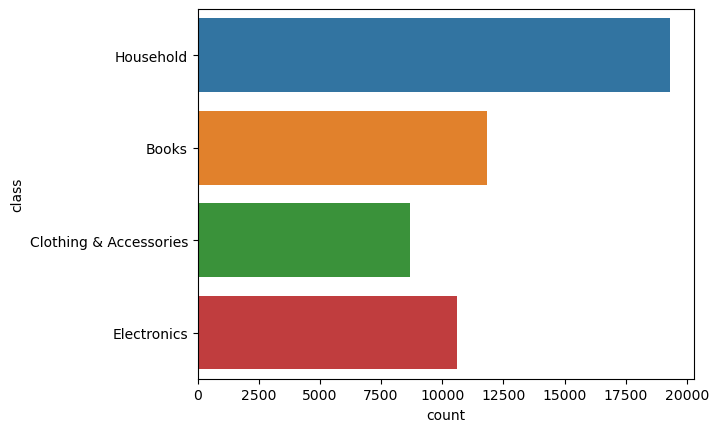

In [10]:
sns.countplot(y=df['class'])

In [11]:
df.isnull().sum()

class    0
text     1
dtype: int64

In [12]:
df.dropna(inplace=True)
df.isnull().sum()

class    0
text     0
dtype: int64

In [13]:
df['text'].apply(lambda x: clean_text(x))

0        [paper, plane, design, frame, wall, hang, moti...
1        [saf, frame, paint, wood, inch, x, inch, speci...
2        [saf, textured, modern, art, print, frame, pai...
3        [saf, flower, print, frame, paint, synthetic, ...
4        [incredible, gift, india, wooden, happy, birth...
                               ...                        
50420    [strontium, microsd, class, memory, card, blac...
50421    [crossbeats, wave, waterproof, bluetooth, wire...
50422    [karbonn, titanium, white, karbonn, titanium, ...
50423    [samsung, guru, fm, black, colour, black, comp...
50424                       [micromax, canvas, win, white]
Name: text, Length: 50424, dtype: object

In [14]:
df

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


In [15]:
y = df['class']

In [16]:
x = df['text']
x

0        Paper Plane Design Framed Wall Hanging Motivat...
1        SAF 'Floral' Framed Painting (Wood, 30 inch x ...
2        SAF 'UV Textured Modern Art Print Framed' Pain...
3        SAF Flower Print Framed Painting (Synthetic, 1...
4        Incredible Gifts India Wooden Happy Birthday U...
                               ...                        
50420    Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421    CrossBeats Wave Waterproof Bluetooth Wireless ...
50422    Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423    Samsung Guru FM Plus (SM-B110E/D, Black) Colou...
50424                     Micromax Canvas Win W121 (White)
Name: text, Length: 50424, dtype: object

In [17]:
# x_vect = tfidf.fit_transform(df['text'])

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 0, stratify= y, test_size=0.25)

/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/dai/anaconda3/envs/NLP/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [19]:
x_train.shape, x_test.shape

((37818,), (12606,))

In [20]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove puctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove reamaning tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [21]:
# define the model
def define_model(vocab_size):
  # define network
  model = Sequential()
  # model.add(Embedding(vocab_size, 100, input_length=max_length))
  model.add(Dense(vocab_size, activation = 'relu'))
  model.add(Dense(100,input_shape = (vocab_size,), activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1,  activation = 'softmax'))
  # compile network
  model.compile(loss = 'CategoricalCrossentropy', optimizer = 'adam', metrics = ['accuracy'])
  # summerize defined model
  model.summary()
  plot_model(model, to_file='model.png',show_shapes=True)
  return model

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3814568146.py, line 7)

In [ ]:
def create_tokenizer(lines):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(lines)
  return tokenizer

In [ ]:
# create the tokenizer
tokenizer = create_tokenizer(x_train) 

In [ ]:
# enocde data
x_train = tokenizer.texts_to_matrix(x_train, mode = 'binary')
x_train.shape

(689, 84727)

In [ ]:
x_test = tokenizer.texts_to_matrix(x_test, mode = 'binary')
x_test.shape

(12606, 84727)

In [ ]:
tokenizer.word_docs

defaultdict(int,
            {'dry': 1439,
             'vegetables': 374,
             'slices': 62,
             'etc': 1945,
             'peels': 5,
             'used': 3877,
             'fruit': 319,
             'slicer': 91,
             'can': 9702,
             'as': 9156,
             '1': 7925,
             '3': 6490,
             'peeler': 37,
             'grates': 8,
             'cheese': 127,
             'fruits': 327,
             'grater': 50,
             'multibranded': 2,
             'in': 20325,
             'vegetable': 255,
             'be': 9231,
             'navisha': 3,
             'and': 28321,
             'awakening': 26,
             'child': 427,
             'a': 21299,
             'abuse': 16,
             'to': 22939,
             'survivor': 10,
             'from': 12278,
             'journey': 381,
             'healer': 7,
             'wounded': 2,
             'the': 24714,
             'sexual': 23,
             'true': 660,
          

In [ ]:
# define network
n_words = x_train.shape[1]
model = define_model(n_words)

ValueError: The last dimension of the inputs to a Dense layer should be defined. Found None. Full input shape received: (None, None)

In [ ]:
n_words = x_train.shape[1]
n_words

44277

In [ ]:
model.fit(x_train, np.array(train_labels), epochs = 10, batch_size=10)

Epoch 1/10


2023-12-17 21:25:25.574001: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 320565480 exceeds 10% of free system memory.
2023-12-17 21:25:25.912083: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 320565480 exceeds 10% of free system memory.
2023-12-17 21:25:26.627587: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-17 21:25:26.765731: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-17 21:25:26.968766: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.33GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-12-17 21:25:27.094019: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory tr

181/181 [==============================] - 15s 67ms/step - loss: 0.6934 - accuracy: 0.5000
Epoch 2/10
181/181 [==============================] - 12s 67ms/step - loss: 0.6932 - accuracy: 0.4928
Epoch 3/10
181/181 [==============================] - 12s 67ms/step - loss: 0.6933 - accuracy: 0.4906
Epoch 4/10
181/181 [==============================] - 12s 67ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 5/10
181/181 [==============================] - 12s 67ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 6/10
181/181 [==============================] - 12s 67ms/step - loss: 0.6932 - accuracy: 0.4917
Epoch 7/10
181/181 [==============================] - 12s 67ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 8/10
181/181 [==============================] - 12s 68ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 9/10
181/181 [==============================] - 12s 68ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 10/10
181/181 [==============================] - 12s 68ms/step - loss: 0.6932 - accurac

In [ ]:
plot_model(model, show_dtype=True, show_layer_activations = True, show_shapes = True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.evaluate(x_test,np.array(test_labels), batch_size=1)

2023-12-17 21:27:31.362835: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 35421600 exceeds 10% of free system memory.


200/200 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931546926498413, 0.5]

In [ ]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is a bad movie.'
text3 = 'This is a best movie'
text4 = 'The acting was bad in this movie'

In [ ]:
def predict(text):
  tokens = clean_doc(text)
  text = " ".join(tokens)
  x_test = tokenizer.texts_to_matrix([text], mode = 'binary')
  prediction = model.predict(x_test)
  if prediction >= 0.5:
    return 'Positive'
  else:
     return 'Negative'

In [ ]:
predict(text1)

1/1 [==============================] - 0s 86ms/step


'Negative'

In [ ]:
predict(text2)

1/1 [==============================] - 0s 20ms/step


'Negative'

In [ ]:
predict(text3)

1/1 [==============================] - 0s 17ms/step


'Negative'

In [ ]:
predict(text4)

1/1 [==============================] - 0s 19ms/step


'Negative'

In [ ]:
# classify a review a negative or positive
def predict_sentiment(review):
  #clean
  tokens = clean_doc(review)
  # Convert to line
  line = ' '.join(tokens)
  # encode
  encoded = tokenizer.texts_to_matrix([line], mode = 'binary')
  # predict sentiment
  yhat = model.predict(encoded, verbose=0)
  # retrieve predicted percentage and lable
  percent_pos = yhat[0 ,0]
  if round(percent_pos) == 0:
    return (1-percent_pos), 'NEGATIVE'
  return percent_pos, "POSITIVE"

In [ ]:
percent, sentiment = predict_sentiment(text1)
print('Review: [%s]\n Sentiment: %s (%.3f%%)' % (text1, sentiment, percent))

Review: [Best movie ever! It was great, I will definitely recommend it.]
 Sentiment: NEGATIVE (0.502%)


In [ ]:
percent, sentiment = predict_sentiment(text2)
print(f'Review: [{text1}]\n Sentiment: {sentiment} ({percent:.3f}%)')

Review: [Best movie ever! It was great, I will definitely recommend it.]
 Sentiment: NEGATIVE (0.502%)


In [ ]:
predict_sentiment(text3)

(0.5017190873622894, 'NEGATIVE')

In [ ]:
predict_sentiment(text4)

(0.5017190873622894, 'NEGATIVE')